In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer



In [4]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')


In [5]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
X.describe

<bound method NDFrame.describe of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

     

In [8]:
print(X.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


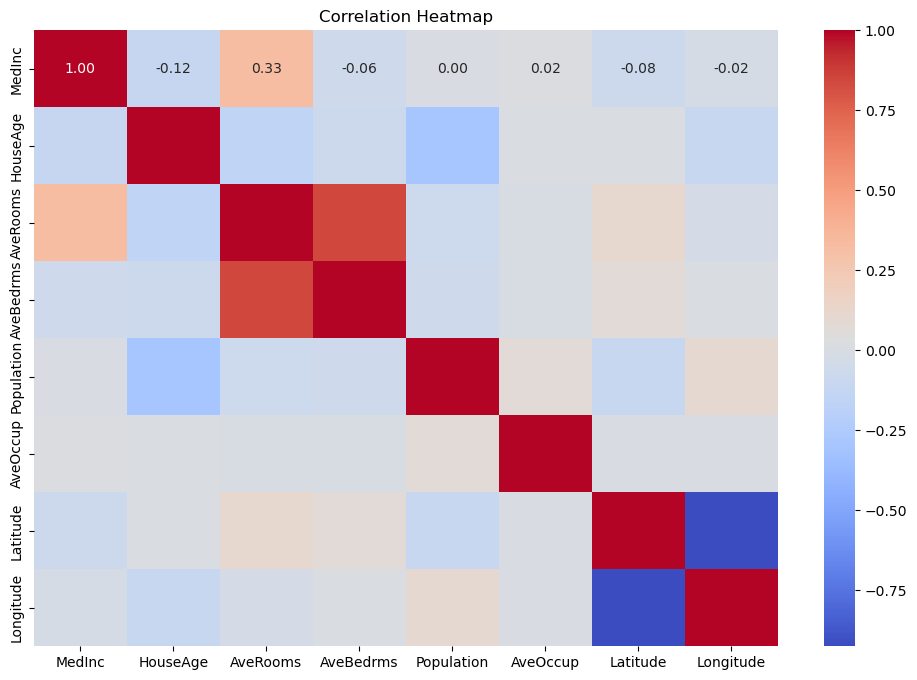

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

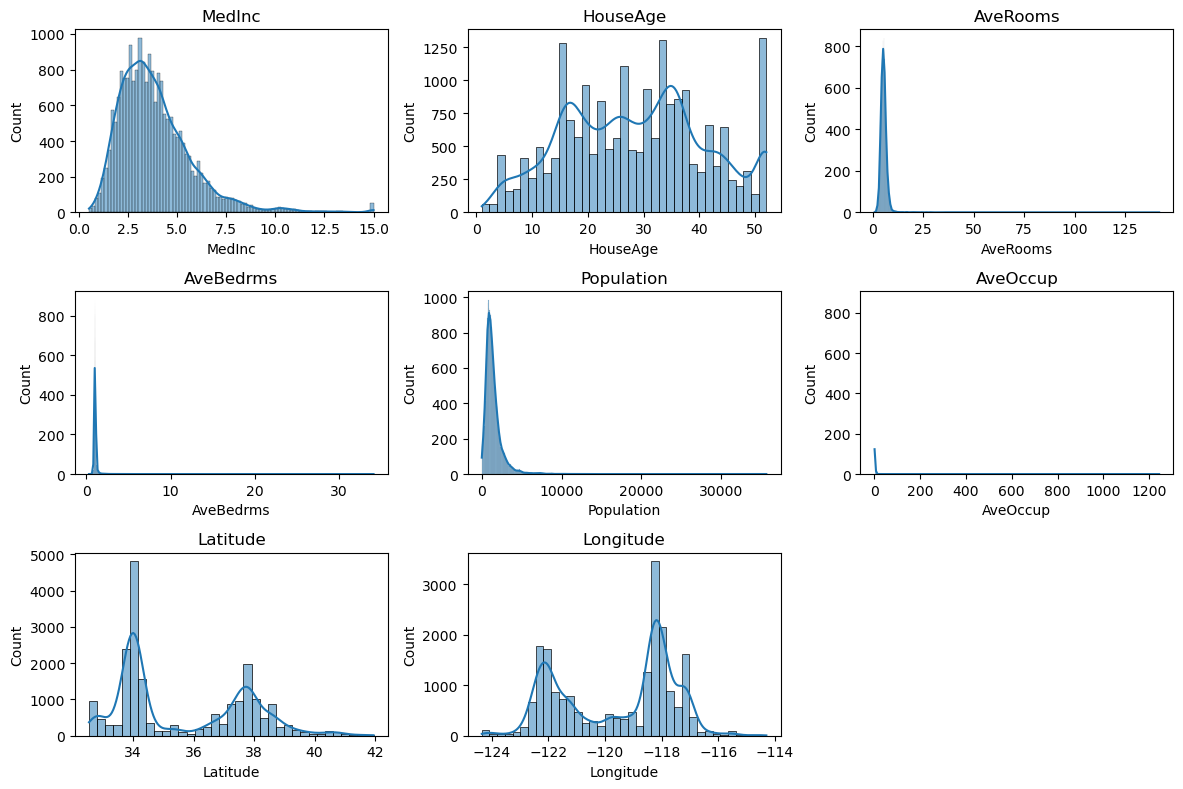

In [10]:

plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

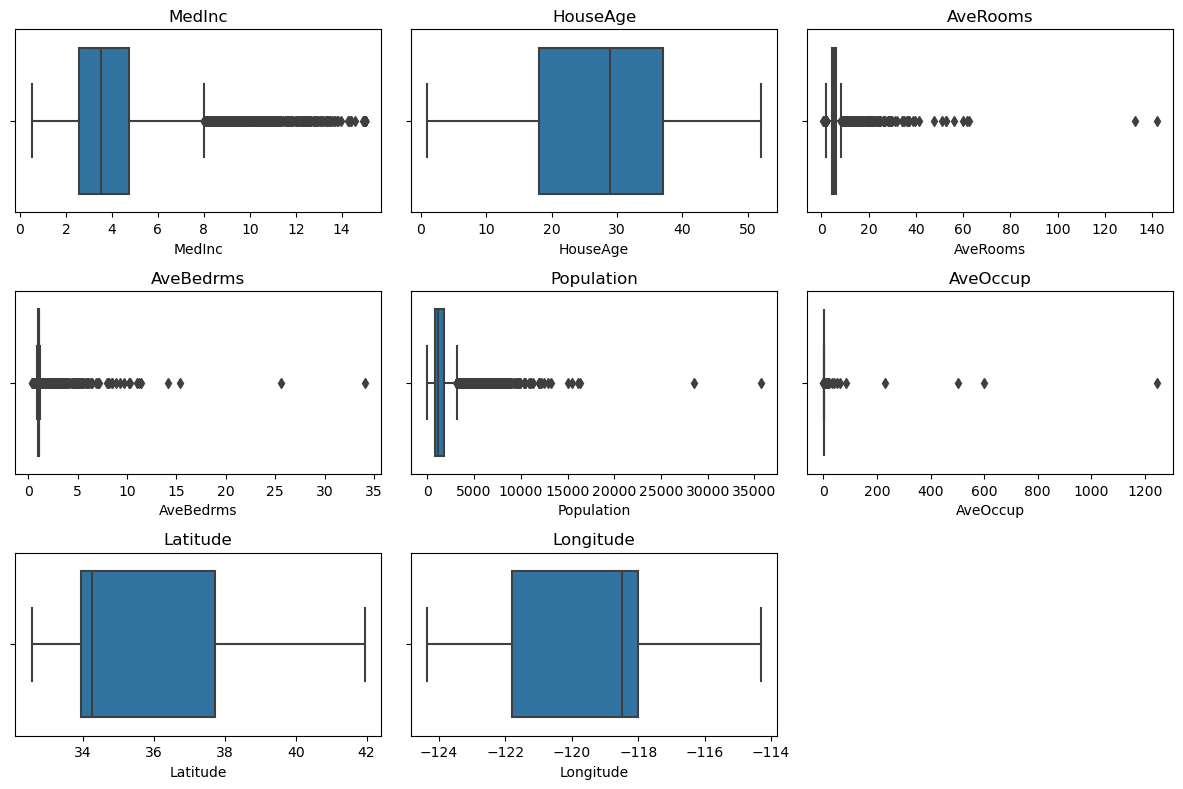

In [11]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=X[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train.insert(0, 'Bias', 1)
X_test.insert(0, 'Bias', 1)


In [13]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            self.weights -= self.learning_rate * dw
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights)



In [14]:
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)




Epoch 100/1000, Loss: 1.3176
Epoch 200/1000, Loss: 0.7141
Epoch 300/1000, Loss: 0.6195
Epoch 400/1000, Loss: 0.5956
Epoch 500/1000, Loss: 0.5830
Epoch 600/1000, Loss: 0.5733
Epoch 700/1000, Loss: 0.5653
Epoch 800/1000, Loss: 0.5585
Epoch 900/1000, Loss: 0.5527
Epoch 1000/1000, Loss: 0.5477


Training Loss: 0.5477
Testing Loss: 0.5672


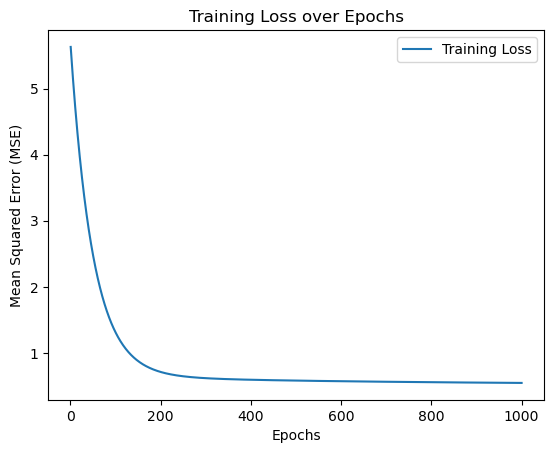

In [15]:


train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

plt.plot(range(1, len(model.loss_history) + 1), model.loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()


In [16]:

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Scratch Model - R2 Score (Train): {r2_train:.4f}")
print(f"Scratch Model - R2 Score (Test): {r2_test:.4f}")




Scratch Model - R2 Score (Train): 0.5903
Scratch Model - R2 Score (Test): 0.5672


In [17]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
y_train_pred_sklearn = sklearn_model.predict(X_train)
y_test_pred_sklearn = sklearn_model.predict(X_test)

r2_train_sklearn = r2_score(y_train, y_train_pred_sklearn)
r2_test_sklearn = r2_score(y_test, y_test_pred_sklearn)
print(f"Scikit-learn Model - R2 Score (Train): {r2_train_sklearn:.4f}")
print(f"Scikit-learn Model - R2 Score (Test): {r2_test_sklearn:.4f}")


Scikit-learn Model - R2 Score (Train): 0.6126
Scikit-learn Model - R2 Score (Test): 0.5758


In [18]:

print("\nComparison of Results:")
print(f"Scratch Model - Training Loss: {train_loss:.4f}, Testing Loss: {test_loss:.4f}")
print(f"Scikit-learn Model - Training Loss: {mean_squared_error(y_train, y_train_pred_sklearn):.4f}, Testing Loss: {mean_squared_error(y_test, y_test_pred_sklearn):.4f}")
print(f"Scratch Model - R2 Score (Train): {r2_train:.4f}, R2 Score (Test): {r2_test:.4f}")
print(f"Scikit-learn Model - R2 Score (Train): {r2_train_sklearn:.4f}, R2 Score (Test): {r2_test_sklearn:.4f}")


Comparison of Results:
Scratch Model - Training Loss: 0.5477, Testing Loss: 0.5672
Scikit-learn Model - Training Loss: 0.5179, Testing Loss: 0.5559
Scratch Model - R2 Score (Train): 0.5903, R2 Score (Test): 0.5672
Scikit-learn Model - R2 Score (Train): 0.6126, R2 Score (Test): 0.5758
